In [1]:
#Problem 1

In [2]:
#a

In [3]:
import numpy as np
import pandas as pd
from scipy.stats import rankdata
from sklearn.cluster import KMeans
np.random.seed(0)

In [4]:
vocab = pd.read_csv('science2k-vocab.txt', header=None)
print(vocab.shape)
vocab = np.array(vocab[0].tolist())
vocab

(5476, 1)


array(['fig', 'cells', 'science', ..., 'duplicated', 'e18',
       'incommensurate'], dtype='<U32')

In [5]:
titles = pd.read_csv('science2k-titles.txt', header=None)
print(titles.shape)
titles = np.array(titles[0].tolist())
titles

(1373, 1)


array(['Archaeology in the Holy Land',
       "Baedeker's Guide, or Just Plain 'Trouble'?",
       "Duchamp's L.H.O.O.Q.-From 1919 or 1930?", ...,
       'Cholinergic Enhancement and Increased Selectivity of Perceptual Processing during Working Memory',
       'A Global Geometric Framework for Nonlinear Dimensionality Reduction',
       'Nonlinear Dimensionality Reduction by Locally Linear Embedding'],
      dtype='<U172')

In [9]:
X = np.load("science2k-doc-word.npy")
print(X.shape)

(1373, 5476)


In [10]:
"""
Cluster the documents using k-means and various values of k (go up to at least k = 20).
Select a value of k.
"""

'\nCluster the documents using k-means and various values of k (go up to at least k = 20).\nSelect a value of k.\n'

In [11]:
for k in range(1,21):
    kmeans = KMeans(n_clusters=k,n_init=2, max_iter=2, random_state=0).fit(X)
    print(k)
    print(kmeans.labels_)
    #break # comment out to run in full (takes a while)

1
[0 0 0 ... 0 0 0]
2
[1 1 1 ... 1 1 1]
3
[2 2 2 ... 1 2 2]
4
[2 2 2 ... 1 2 2]
5
[2 2 2 ... 1 2 2]
6
[2 2 2 ... 1 5 2]
7
[6 6 6 ... 1 6 6]
8
[5 5 5 ... 2 2 5]
9
[3 3 3 ... 5 6 6]
10
[7 7 7 ... 7 3 7]
11
[5 5 5 ... 2 2 5]
12
[1 1 1 ... 9 2 2]
13
[ 5  5  5 ...  2 10  5]
14
[11 11 11 ...  4  4  4]
15
[14 14 10 ...  3  3  3]
16
[9 7 9 ... 2 2 2]
17
[ 5  5  5 ...  2 16  5]
18
[ 5  5  5 ...  2 16  5]
19
[ 5  5  5 ...  2 16  5]
20
[9 9 9 ... 1 1 8]


In [12]:
"""
Select a value of k. 


For that value, report the top 10 words of each cluster in order of the largest positive distance
from the average value across all data. More specifically, if x is the 5476-vector of average
values across documents and m i is the i th mean, report the words associated with the top
components in m i − x. Report the top ten documents that fall closest to each cluster center.
You can find the titles in the science2k-titles.dat file.
"""

'\nSelect a value of k. \n\n\nFor that value, report the top 10 words of each cluster in order of the largest positive distance\nfrom the average value across all data. More specifically, if x is the 5476-vector of average\nvalues across documents and m i is the i th mean, report the words associated with the top\ncomponents in m i − x. Report the top ten documents that fall closest to each cluster center.\nYou can find the titles in the science2k-titles.dat file.\n'

In [13]:
kmeans = KMeans(n_clusters=6, n_init=60,max_iter=600, random_state=0).fit(X)

In [14]:
x_bar = X.mean(axis=0)
x_bar.shape

(5476,)

In [15]:
for cluster_label in np.unique(kmeans.labels_):
    #print(cluster_label)
    cluster = X[(kmeans.labels_==cluster_label),:]
    print(cluster.shape)
    diff = np.abs(cluster-x_bar)
    sum_diff = diff.sum(axis=0)
    sum_diff_rank = (rankdata(-sum_diff, method='ordinal')-1).astype(int)
    get_indices = np.where(sum_diff_rank < 10)[0]
    print('top ten words for cluster label: ' + str(cluster_label))
    print(vocab[get_indices])
    cluster_x_bar = cluster.mean(axis=0)
    #print(cluster_x_bar.shape)
    diff = np.abs(cluster-cluster_x_bar)
    #print(diff.shape)
    sum_diff = diff.sum(axis=1)
    #print(sum_diff)
    #print(sum_diff.shape)
    sum_diff_rank = (rankdata(sum_diff, method='ordinal')-1).astype(int)
    get_indices = np.where(sum_diff_rank < 10)[0]
    #print(get_indices)
    print('top ten titles for cluster label: ' + str(cluster_label))
    print(titles[get_indices])   
    print('')
    

(35, 5476)
top ten words for cluster label: 0
['binding' 'domain' 'side' 'residues' 'crystal' 'structural' 'conserved'
 'helix' 'loop' 'bond']
top ten titles for cluster label: 0
['Archaeology in the Holy Land' "Duchamp's L.H.O.O.Q.-From 1919 or 1930?"
 'Corrections and Clarifications: First-Principles Determination of Elastic Anisotrophy and Wave Velocities of MgO at Lower Mantle Conditions'
 'A Crushing End for Our Galaxy'
 'The Galactic Center: An Interacting System of Unusual Sources'
 'Protein Interaction Mapping in C. elegans Using Proteins Involved in Vulval Development'
 'A Short Fe-Fe Distance in Peroxodiferric Ferritin: Control of Fe Substrate versus Cofactor Decay?'
 'DNA Topoisomerase IIb and Neural Development'
 'Stat3-Mediated Transformation of NIH-3T3 Cells by the Constitutively Active Q205L <latex>$G\\alpha_o$</latex> Protein'
 'Of Chimps and Men']

(211, 5476)
top ten words for cluster label: 1
['surface' 'structure' 'temperature' 'energy' 'field' 'density' 'electron'


In [16]:
"""
Comment on these results. 
The kmeans algorithm is sensitive to k. I tried multiple k values.
Some k-values like k = 20 resulted in very small clusters with a handful of documents each.
I tried multiple k values and found one that gave intuitive results.

What has the algorithm captured? 
The algorithm captures a few obvious categories: One being biology science realted (cluster 3).
The other being physics related (cluster 1)

This algorithm feature space is less useful for finding good titles - the terms are well classified though.

How might such an algorithm be useful?
It would be useful in unsupervised topic modeling or document classification. 
This would work in cases where labels are not present or difficult to obtain.
"""

'\nComment on these results. \nThe kmeans algorithm is sensitive to k. I tried multiple k values.\nSome k-values like k = 20 resulted in very small clusters with a handful of documents each.\nI tried multiple k values and found one that gave intuitive results.\n\nWhat has the algorithm captured? \nThe algorithm captures a few obvious categories: One being biology science realted (cluster 3).\nThe other being physics related (cluster 1)\n\nThis algorithm feature space is less useful for finding good titles - the terms are well classified though.\n\nHow might such an algorithm be useful?\nIt would be useful in unsupervised topic modeling or document classification. \nThis would work in cases where labels are not present or difficult to obtain.\n'

In [17]:
#b

In [19]:
X = np.load("science2k-word-doc.npy")
print(X.shape)

(5476, 1373)


In [20]:
for k in range(1,21):
    kmeans = KMeans(n_clusters=k,n_init=2, max_iter=2, random_state=0).fit(X)
    print(k)
    print(kmeans.labels_)
    #break # comment out to run in full (takes a while)

1
[0 0 0 ... 0 0 0]
2
[1 1 0 ... 0 0 0]
3
[1 1 2 ... 2 2 2]
4
[1 1 3 ... 3 3 3]
5
[3 3 3 ... 3 3 3]
6
[0 3 2 ... 2 2 2]
7
[5 5 1 ... 1 1 1]
8
[3 2 6 ... 6 6 6]
9
[3 0 8 ... 8 8 8]
10
[8 1 0 ... 0 0 0]
11
[7 3 8 ... 8 8 8]
12
[2 9 7 ... 7 7 7]
13
[6 4 0 ... 0 0 0]
14
[ 4 12  5 ...  5  5  5]
15
[ 8 11 12 ... 12 12 12]
16
[ 4  1 10 ... 10 10 10]
17
[ 8  7  5 ...  5 14 14]
18
[14  8  1 ...  1  1  1]
19
[14  7  8 ...  1  1  1]
20
[10 14  9 ...  9  9  9]


In [21]:
"""
Select a value of k. 


For that value, report the top 10 words of each cluster in order of the largest positive distance
from the average value across all data. More specifically, if x is the 5476-vector of average
values across documents and m i is the i th mean, report the words associated with the top
components in m i − x. Report the top ten documents that fall closest to each cluster center.
You can find the titles in the science2k-titles.dat file.
"""

'\nSelect a value of k. \n\n\nFor that value, report the top 10 words of each cluster in order of the largest positive distance\nfrom the average value across all data. More specifically, if x is the 5476-vector of average\nvalues across documents and m i is the i th mean, report the words associated with the top\ncomponents in m i − x. Report the top ten documents that fall closest to each cluster center.\nYou can find the titles in the science2k-titles.dat file.\n'

In [22]:
kmeans = KMeans(n_clusters=6, n_init=60,max_iter=600, random_state=0).fit(X)

In [23]:
x_bar = X.mean(axis=0)
x_bar.shape

(1373,)

In [24]:
for cluster_label in np.unique(kmeans.labels_):
    #print(cluster_label)
    cluster = X[(kmeans.labels_==cluster_label),:]
    print(cluster.shape)
    diff = np.abs(cluster-x_bar)
    sum_diff = diff.sum(axis=0)
    sum_diff_rank = (rankdata(-sum_diff, method='ordinal')-1).astype(int)
    get_indices = np.where(sum_diff_rank < 10)[0]
    print('top ten titles for cluster label: ' + str(cluster_label))
    print(titles[get_indices])
    cluster_x_bar = cluster.mean(axis=0)
    #print(cluster_x_bar.shape)
    diff = np.abs(cluster-cluster_x_bar)
    #print(diff.shape)
    sum_diff = diff.sum(axis=1)
    #print(sum_diff)
    #print(sum_diff.shape)
    sum_diff_rank = (rankdata(sum_diff, method='ordinal')-1).astype(int)
    get_indices = np.where(sum_diff_rank < 10)[0]
    #print(get_indices)
    print('top ten words for cluster label: ' + str(cluster_label))
    print(vocab[get_indices])   
    print('')
    

(293, 1373)
top ten titles for cluster label: 0
['Crystal Structure of the Ribonucleoprotein Core of the Signal Recognition Particle'
 'The Genome Sequence of Drosophila melanogaster'
 'Comparative Genomics of the Eukaryotes'
 'Positional Syntenic Cloning and Functional Characterization of the Mammalian Circadian Mutation tau'
 'A Structural Framework for Deciphering the Link between <latex>$I-A^{g7}$</latex> and Autoimmune Diabetes'
 'Architecture of RNA Polymerase II and Implications for the Transcription Mechanism'
 'Three-Dimensional Structure of the Tn5 Synaptic Complex Transposition Intermediate'
 'The Complete Atomic Structure of the Large Ribosomal Subunit at 2.4 <latex>$\\AA$</latex> Resolution'
 'The Structural Basis of Ribosome Activity in Peptide Bond Synthesis'
 'Accumulation of Dietary Cholesterol in Sitosterolemia Caused by Mutations in Adjacent ABC Transporters']
top ten words for cluster label: 0
['major' 'individual' 'north' 'groups' 'behavior' 'observations' 'res'
 '

In [25]:
"""
(b) The file science2k-word-doc.txt is similar, but capture term-wise rather than document-
wise features. That is, for each term, we count the frequency as the number of documents that
term appears in rather than the other way around. This allows us to characterize individual
terms.
Had to switch some code from part 1a since now our titles and terms are reversed to do lookups.


This matrix is 5476×1373, where each row is a term in Science described by 1373 “document”
features. These are transformed document frequencies (as above).


Repeat the analysis above, but cluster terms instead of documents. 
Done above


Comment on these results. 
There are more terms (rows) compared to independent documents (columns). 
In 1b) we have less columns and more rows.
The titles seem better clustered compared to the terms. 

How might such an algorithm be useful? 
This algorithm is more useful to create homogeneous title clusters compared to before 1a.
The index and inverse index methods are useful in large scale classification problems. 
Using both the index and inverse index allows for large scale classification when there are both 
billions of rows and billions of columns. 

What is different about clustering terms from clustering documents?
Clustering terms in the document space produces document title clusters that seem more intuitive similiar.

Now terms are classified that have the same feature space of document presenence. 

Suppose term A and term B are found in exactly the same documents and not found in exactly the same documents.
These terms would share the same cluster in 1b) but not necessarily the case in 1a)
This is because in 1a) a document can contain more than just term A and term B. 

Both these steps can be used for something like an EM algorithm to produce better clusters. 
"""

'\n(b) The file science2k-word-doc.txt is similar, but capture term-wise rather than document-\nwise features. That is, for each term, we count the frequency as the number of documents that\nterm appears in rather than the other way around. This allows us to characterize individual\nterms.\nHad to switch some code from part 1a since now our titles and terms are reversed to do lookups.\n\n\nThis matrix is 5476×1373, where each row is a term in Science described by 1373 “document”\nfeatures. These are transformed document frequencies (as above).\n\n\nRepeat the analysis above, but cluster terms instead of documents. \nDone above\n\n\nComment on these results. \nThere are more terms (rows) compared to independent documents (columns). \nIn 1b) we have less columns and more rows.\nThe titles seem better clustered compared to the terms. \n\nHow might such an algorithm be useful? \nThis algorithm is more useful to create homogeneous title clusters compared to before 1a.\nThe index and inverse

In [26]:
#Problem 2

In [27]:
#a

K-means as EM

E-step: Fix means of each cluster, optimize the assignment of points to clusters.

M-step: Fix assignment of points to clusters, optimize the means of each cluster.

$ Expectation \sum_{j=1}^n \min_{C(j)} ||\mu_{C(j)} - x_{j}||^2 $

^ Adjust cluster assignment given fixed cluster means

$ Maximization  \sum_{j=1}^n \min_{\mu_j} ||\mu_{j} - x_{j}||^2 $

^ Adjust cluster means given fixed assignment of points to clusters

The K-means algorithm is a GMM (solved via EM) with fixed covariance matrix to the identity matrix. 
Do not update covariance matrix at any step. 
During the Expectation step of adjusting cluster assignment, only allow for hard membership {0,1} probabilities (responsibilities). 
E.g. a point can be part of a cluster or not rather than having continuous probabilities like 0.33. Objective function of k-means is distance based rather than log liklihood.

In [28]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

np.random.seed(0)

In [29]:
df = pd.read_csv('faithful.csv')
df.drop('Unnamed: 0', inplace=True, axis=1)

"""
(b) Download the Old Faithful Geyser Dataset. The data file contains 272 observations of (erup-
tion time, waiting time). Treat each entry as a 2 dimensional feature vector. Parse and plot all
data points on 2-D plane.
"""
df.head(3)

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74


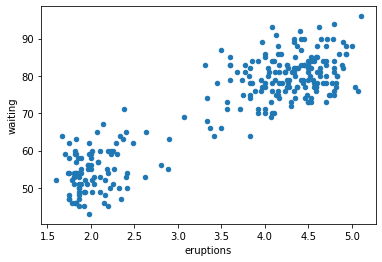

In [30]:
df.plot.scatter(x='eruptions',y='waiting')

In [31]:
"""
(c) Implement a bimodal GMM model to fit all data points using EM algorithm. Explain the rea-
soning behind your termination criteria. For this problem, we assume the covariance matrix
is spherical (i.e., it has the form of σ 2 I for scalar σ) and you can randomly initialize Gaussian
parameters. For evaluation purposes, please submit the following figures:


Explain the reasoning behind your termination criteria.
My code terminates when the last two iterations have a total delta absolute 
change in cluster centers less than tolerance.
This works because the tolerance is much less than 1 standard dev of entire set,
and there are only two clusters.

Ideal implementation would also 
consider loglikelihood rate of change slows down and is small relative to some tolerance value.

"""

'\n(c) Implement a bimodal GMM model to fit all data points using EM algorithm. Explain the rea-\nsoning behind your termination criteria. For this problem, we assume the covariance matrix\nis spherical (i.e., it has the form of σ 2 I for scalar σ) and you can randomly initialize Gaussian\nparameters. For evaluation purposes, please submit the following figures:\n\n\nExplain the reasoning behind your termination criteria.\nMy code terminates when the last two iterations have a total delta absolute \nchange in cluster centers less than tolerance.\nThis works because the tolerance is much less than 1 standard dev of entire set,\nand there are only two clusters.\n\nIdeal implementation would also \nconsider loglikelihood rate of change slows down and is small relative to some tolerance value.\n\n'

In [32]:
def get_ll(x,mu,sigma):
    t1 = - np.log(sigma)
    t2 =  - np.log(2*np.pi)/2
    t3 = - 0.5*((x-mu)/sigma)**2
    return t1 + t2 + t3



X = df[['eruptions','waiting']].values
X.shape

(272, 2)

In [33]:
np.random.seed(1)
init1 = ((df['eruptions'].sample(frac=1, replace=True).mean(),
         df['waiting'].sample(frac=1, replace=True).mean()),
         (df['eruptions'].sample(frac=1, replace=True).std(),
         df['waiting'].sample(frac=1, replace=True).std()))


init2 = ((df['eruptions'].sample(frac=1, replace=False).mean(),
         df['waiting'].sample(frac=1, replace=False).mean()),
         (df['eruptions'].sample(frac=1, replace=False).std(),
         df['waiting'].sample(frac=1, replace=False).std()))

#prior_class = 0.5

mean_vec_list = [(init1,init2)]
converge_tol = 0.001
steps = 0
delta = 1
#weights = np.array([1]*len(X))
while delta > converge_tol:
    #print(prob_list)
    # e-step Adjust cluster assignment given fixed cluster means
    mu0 = mean_vec_list[steps][0][0][0]
    mu1 = mean_vec_list[steps][0][0][1]
    s0 = mean_vec_list[steps][0][1][0]
    s1 = mean_vec_list[steps][0][1][1]
    l0_vec = get_ll(X[:,0],mu0,s0)
    l1_vec = get_ll(X[:,1],mu1,s1)
    r0 = (l0_vec+l1_vec)/2
    
    # steps,cluster,mean,dim
    mu0 = mean_vec_list[steps][1][0][0]
    mu1 = mean_vec_list[steps][1][0][1]
    s0 = mean_vec_list[steps][1][1][0]
    s1 = mean_vec_list[steps][1][1][1]
    l0_vec = get_ll(X[:,0],mu0,s0)
    l1_vec = get_ll(X[:,1],mu1,s1)
    r1 = (l0_vec+l1_vec)/2
    
    # normalize
    r0 = np.exp(r0)/(np.exp(r0)+np.exp(r1))
    r1 = 1-r0
    color_vector = np.argmax(np.vstack((r0,r1)),axis=0)
    #print(r0)
    #print(r1)
    # m-step - update params
    # cluster0
    rsum = np.sum(r0)
    m0 = np.sum(r0*X[:,0])/rsum
    s0 = np.sqrt(np.sum(r0*(X[:,0]-m0)**2)/rsum)
    
    m1 = np.sum(r0*X[:,1])/rsum
    s1 = np.sqrt(np.sum(r0*(X[:,1]-m1)**2)/rsum)
    tup0 = ((m0,m1),(s0,s1))
       
    #cluster1
    rsum = np.sum(r1)
    m0 = np.sum(r1*X[:,0])/rsum
    s0 = np.sqrt(np.sum(r1*(X[:,0]-m0)**2)/rsum)
    
    m1 = np.sum(r1*X[:,1])/rsum
    s1 = np.sqrt(np.sum(r1*(X[:,1]-m1)**2)/rsum)
    tup1 = ((m0,m1),(s0,s1))
    mean_vec_list.append((tup0,tup1))

    steps += 1
    
    # check delta of mu (not sigma) values. 
    delta1 = np.abs(mean_vec_list[-2][0][0][0]-mean_vec_list[-1][0][0][0]) 
    delta2 =  np.abs(mean_vec_list[-2][1][0][0]-mean_vec_list[-1][1][0][0])
    delta3 = np.abs(mean_vec_list[-2][0][0][1]-mean_vec_list[-1][0][0][1]) 
    delta4 =  np.abs(mean_vec_list[-2][1][0][1]-mean_vec_list[-1][1][0][1])
    delta = delta1+delta2+delta3+delta4
    #print(delta)
    #if steps > 5:
    #    break
            
    

In [34]:
"""
Plot the trajectories of two mean vectors in 2 dimensions (i.e., coordinates vs. iteration)
"""

'\nPlot the trajectories of two mean vectors in 2 dimensions (i.e., coordinates vs. iteration)\n'

In [35]:
t1 = []
t2 = []
t3 = []
t4 = []
for j in range(len(mean_vec_list)):
    c1_x = mean_vec_list[j][0][0][0]
    c1_y = mean_vec_list[j][0][0][1]
    
    c2_x = mean_vec_list[j][1][0][0]
    c2_y = mean_vec_list[j][1][0][1]
    
    t1.append(c1_x)
    t2.append(c1_y)
    t3.append(c2_x)
    t4.append(c2_y)
print('done')
    

done


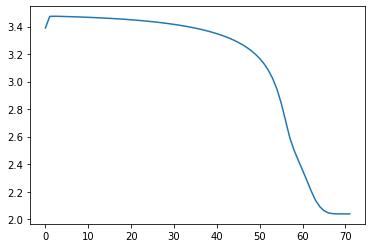

In [36]:
pd.Series(t1).plot()

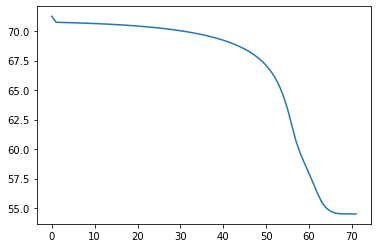

In [37]:
pd.Series(t2).plot()

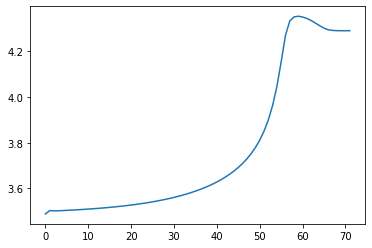

In [38]:
pd.Series(t3).plot()

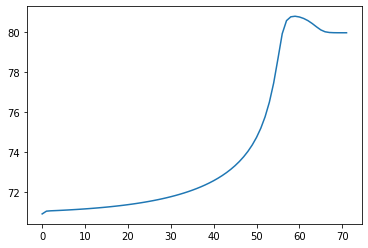

In [39]:
pd.Series(t4).plot()

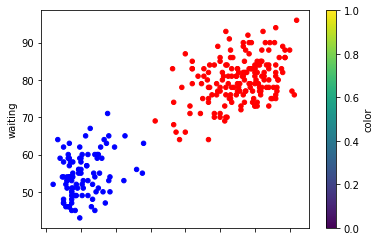

In [40]:
df['color'] = 'red'
df.loc[color_vector==0,'color'] = 'blue'
df.plot.scatter(x='eruptions',y='waiting',c='color')

In [41]:
"""

Run your program for 50 times with different initial parameter guesses. Show the distri-
bution of the total number of iterations needed for algorithm to converge.
"""

'\n\nRun your program for 50 times with different initial parameter guesses. Show the distri-\nbution of the total number of iterations needed for algorithm to converge.\n'

In [42]:
total_iter_list = []
for rseed in range(1,51):
    np.random.seed(rseed)
    init1 = ((df['eruptions'].sample(frac=1, replace=True).mean(),
             df['waiting'].sample(frac=1, replace=True).mean()),
             (df['eruptions'].sample(frac=1, replace=True).std(),
             df['waiting'].sample(frac=1, replace=True).std()))


    init2 = ((df['eruptions'].sample(frac=1, replace=False).mean(),
             df['waiting'].sample(frac=1, replace=False).mean()),
             (df['eruptions'].sample(frac=1, replace=False).std(),
             df['waiting'].sample(frac=1, replace=False).std()))

    #prior_class = 0.5

    mean_vec_list = [(init1,init2)]
    converge_tol = 0.001
    steps = 0
    delta = 1
    #weights = np.array([1]*len(X))
    while delta > converge_tol:
        #print(prob_list)
        # e-step Adjust cluster assignment given fixed cluster means
        mu0 = mean_vec_list[steps][0][0][0]
        mu1 = mean_vec_list[steps][0][0][1]
        s0 = mean_vec_list[steps][0][1][0]
        s1 = mean_vec_list[steps][0][1][1]
        l0_vec = get_ll(X[:,0],mu0,s0)
        l1_vec = get_ll(X[:,1],mu1,s1)
        r0 = (l0_vec+l1_vec)/2

        # steps,cluster,mean,dim
        mu0 = mean_vec_list[steps][1][0][0]
        mu1 = mean_vec_list[steps][1][0][1]
        s0 = mean_vec_list[steps][1][1][0]
        s1 = mean_vec_list[steps][1][1][1]
        l0_vec = get_ll(X[:,0],mu0,s0)
        l1_vec = get_ll(X[:,1],mu1,s1)
        r1 = (l0_vec+l1_vec)/2

        # normalize
        r0 = np.exp(r0)/(np.exp(r0)+np.exp(r1))
        r1 = 1-r0
        color_vector = np.argmax(np.vstack((r0,r1)),axis=0)
        #print(r0)
        #print(r1)
        # m-step - update params
        # cluster0
        rsum = np.sum(r0)
        m0 = np.sum(r0*X[:,0])/rsum
        s0 = np.sqrt(np.sum(r0*(X[:,0]-m0)**2)/rsum)

        m1 = np.sum(r0*X[:,1])/rsum
        s1 = np.sqrt(np.sum(r0*(X[:,1]-m1)**2)/rsum)
        tup0 = ((m0,m1),(s0,s1))

        #cluster1
        rsum = np.sum(r1)
        m0 = np.sum(r1*X[:,0])/rsum
        s0 = np.sqrt(np.sum(r1*(X[:,0]-m0)**2)/rsum)

        m1 = np.sum(r1*X[:,1])/rsum
        s1 = np.sqrt(np.sum(r1*(X[:,1]-m1)**2)/rsum)
        tup1 = ((m0,m1),(s0,s1))
        mean_vec_list.append((tup0,tup1))

        steps += 1

        # check delta of mu (not sigma) values. 
        delta1 = np.abs(mean_vec_list[-2][0][0][0]-mean_vec_list[-1][0][0][0]) 
        delta2 =  np.abs(mean_vec_list[-2][1][0][0]-mean_vec_list[-1][1][0][0])
        delta3 = np.abs(mean_vec_list[-2][0][0][1]-mean_vec_list[-1][0][0][1]) 
        delta4 =  np.abs(mean_vec_list[-2][1][0][1]-mean_vec_list[-1][1][0][1])
        delta = delta1+delta2+delta3+delta4
        #print(delta)
        #if steps > 5:
        #    break
    total_iter_list.append(steps)
print('done')

done


In [43]:
"""
sometimes lucky random init results in < 10 iter convergence, 
but mostly above 40 iter convergence.
"""

'\nsometimes lucky random init results in < 10 iter convergence, \nbut mostly above 40 iter convergence.\n'

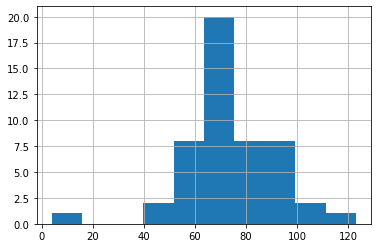

In [44]:
pd.Series(total_iter_list).hist()

In [45]:
"""
Compare the algorithm performances of (c) and (d).

K-means+MLE init is much better and more stable in general. 
In an edge case, the random init can result in a single class dominating.
This is rare, but can happen.

KmeansMLE init will converge faster than random in most cases.

(d) Repeat the task in (c) but with the initial guesses of the parameters generated from the fol-
lowing process:
• Run a k-means algorithm over all the data points with K = 2 and label each point with
one of the two clusters.
• Estimate the first guess of the mean and covariance matrices using maximum likelihood
over the labeled data points.
"""

'\nCompare the algorithm performances of (c) and (d).\n\nK-means+MLE init is much better and more stable in general. \nIn an edge case, the random init can result in a single class dominating.\nThis is rare, but can happen.\n\nKmeansMLE init will converge faster than random in most cases.\n\n(d) Repeat the task in (c) but with the initial guesses of the parameters generated from the fol-\nlowing process:\n• Run a k-means algorithm over all the data points with K = 2 and label each point with\none of the two clusters.\n• Estimate the first guess of the mean and covariance matrices using maximum likelihood\nover the labeled data points.\n'

In [46]:
X = df[['eruptions','waiting']].values
X.shape
total_iter_list = []
for rseed in range(1,51):
    np.random.seed(rseed)
    
    kmeans = KMeans(n_clusters=2, n_init=30, max_iter=300, random_state=rseed).fit(X)
    df['eruptions'][kmeans.labels_==0].mean()
    
    init1 = (( df['eruptions'][kmeans.labels_==0].mean(),
              df['waiting'][kmeans.labels_==0].mean()),
             (df['eruptions'][kmeans.labels_==0].std(),
             df['waiting'][kmeans.labels_==0].std()))


    init2 = (( df['eruptions'][kmeans.labels_==1].mean(),
              df['waiting'][kmeans.labels_==1].mean()),
             (df['eruptions'][kmeans.labels_==1].std(),
             df['waiting'][kmeans.labels_==1].std()))

    #prior_class = 0.5

    mean_vec_list = [(init1,init2)]
    converge_tol = 0.001
    steps = 0
    delta = 1
    #weights = np.array([1]*len(X))
    while delta > converge_tol:
        #print(prob_list)
        # e-step Adjust cluster assignment given fixed cluster means
        mu0 = mean_vec_list[steps][0][0][0]
        mu1 = mean_vec_list[steps][0][0][1]
        s0 = mean_vec_list[steps][0][1][0]
        s1 = mean_vec_list[steps][0][1][1]
        l0_vec = get_ll(X[:,0],mu0,s0)
        l1_vec = get_ll(X[:,1],mu1,s1)
        r0 = (l0_vec+l1_vec)/2

        # steps,cluster,mean,dim
        mu0 = mean_vec_list[steps][1][0][0]
        mu1 = mean_vec_list[steps][1][0][1]
        s0 = mean_vec_list[steps][1][1][0]
        s1 = mean_vec_list[steps][1][1][1]
        l0_vec = get_ll(X[:,0],mu0,s0)
        l1_vec = get_ll(X[:,1],mu1,s1)
        r1 = (l0_vec+l1_vec)/2

        # normalize
        r0 = np.exp(r0)/(np.exp(r0)+np.exp(r1))
        r1 = 1-r0
        color_vector = np.argmax(np.vstack((r0,r1)),axis=0)
        #print(r0)
        #print(r1)
        # m-step - update params
        # cluster0
        rsum = np.sum(r0)
        m0 = np.sum(r0*X[:,0])/rsum
        s0 = np.sqrt(np.sum(r0*(X[:,0]-m0)**2)/rsum)

        m1 = np.sum(r0*X[:,1])/rsum
        s1 = np.sqrt(np.sum(r0*(X[:,1]-m1)**2)/rsum)
        tup0 = ((m0,m1),(s0,s1))

        #cluster1
        rsum = np.sum(r1)
        m0 = np.sum(r1*X[:,0])/rsum
        s0 = np.sqrt(np.sum(r1*(X[:,0]-m0)**2)/rsum)

        m1 = np.sum(r1*X[:,1])/rsum
        s1 = np.sqrt(np.sum(r1*(X[:,1]-m1)**2)/rsum)
        tup1 = ((m0,m1),(s0,s1))
        mean_vec_list.append((tup0,tup1))

        steps += 1

        # check delta of mu (not sigma) values. 
        delta1 = np.abs(mean_vec_list[-2][0][0][0]-mean_vec_list[-1][0][0][0]) 
        delta2 =  np.abs(mean_vec_list[-2][1][0][0]-mean_vec_list[-1][1][0][0])
        delta3 = np.abs(mean_vec_list[-2][0][0][1]-mean_vec_list[-1][0][0][1]) 
        delta4 =  np.abs(mean_vec_list[-2][1][0][1]-mean_vec_list[-1][1][0][1])
        delta = delta1+delta2+delta3+delta4
        #print(delta)
        #if steps > 5:
        #    break
    total_iter_list.append(steps)
print('done')

done


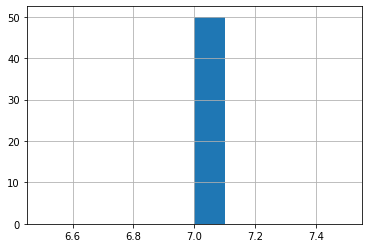

In [47]:
pd.Series(total_iter_list).hist()

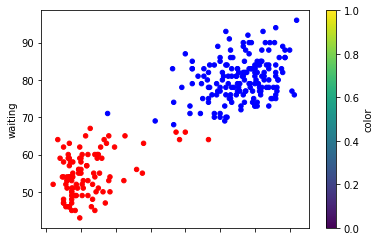

In [48]:
df['color'] = 'red'
df.loc[kmeans.labels_==0,'color'] = 'blue'
df.plot.scatter(x='eruptions',y='waiting',c='color')

In [49]:
t1 = []
t2 = []
t3 = []
t4 = []
for j in range(len(mean_vec_list)):
    c1_x = mean_vec_list[j][0][0][0]
    c1_y = mean_vec_list[j][0][0][1]
    
    c2_x = mean_vec_list[j][1][0][0]
    c2_y = mean_vec_list[j][1][0][1]
    
    t1.append(c1_x)
    t2.append(c1_y)
    t3.append(c2_x)
    t4.append(c2_y)
print('done')

done


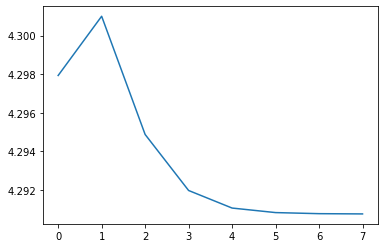

In [50]:
pd.Series(t1).plot()

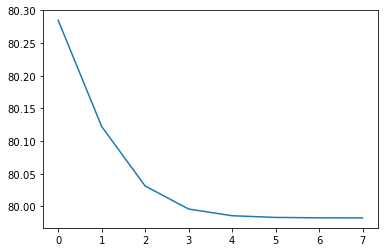

In [51]:
pd.Series(t2).plot()

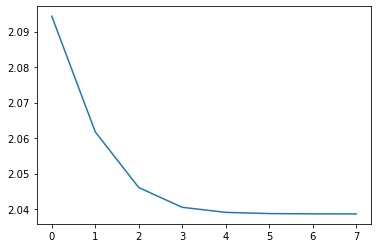

In [52]:
pd.Series(t3).plot()

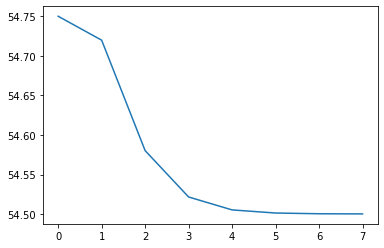

In [53]:
pd.Series(t4).plot()

In [54]:
"""
k-means init w/ MLE will result in GMM EM almost always converging within 8 iterations. 
this is not the same with random init. you could get lucky with random init, but it is usually slower.

converges to basically the same point for both of them. 


"""

'\nk-means init w/ MLE will result in GMM EM almost always converging within 8 iterations. \nthis is not the same with random init. you could get lucky with random init, but it is usually slower.\n\nconverges to basically the same point for both of them. \n\n\n'